# Project 2

Due date: July 27, 2021, 11:59 pm

- The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: July 27, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
- Projects will not be received after the delivery time or by any other means than the one established.

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import zipfile
import os

In [2]:
ruta = r'https://github.com/davidzarruk/AdvancedMethodsDataAnalysisClass/blob/main/datasets/dataTrain_carListings.zip'

In [3]:
os.chdir(r'C:\Users\Leonardo\Downloads')

In [5]:
carpeta_zip =  [i for i in os.listdir() if 'dataTrain_carListings' in  i][0]

with zipfile.ZipFile(carpeta_zip) as punto_zip:
    punto_zip.extract(punto_zip.namelist()[0])
    data = pd.read_csv(punto_zip.namelist()[0])
    punto_zip.close()  

In [6]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [7]:
data.shape

(500000, 6)

In [8]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Price'>

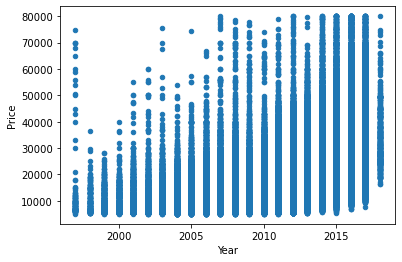

In [9]:
data.plot(kind='scatter', y='Price', x='Year')

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

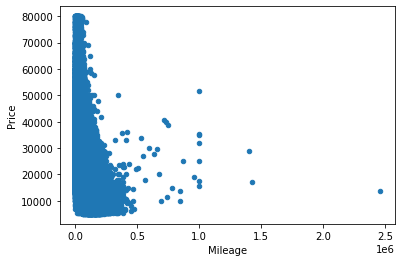

In [10]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [11]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the models using a manually implemented K-Fold (K=10) cross-validation
- 25% - Notebook explaining the process for selecting the best model. You must specify how the calibration of each of the parameters is done and how these change the performance of the model. It is expected that a clear comparison will be made of all implemented models.. Present the most relevant conslusions about the whole process. 


In [105]:
# Para la variable make:

make = data.Make.value_counts().to_frame()
make['cumsum'] = make.Make.cumsum()
make['pct']= make['cumsum'] / 500000

# Para la variable modelo:

modelos = data.Model.value_counts().to_frame()
modelos['cumsum'] = modelos.Model.cumsum()
modelos['pct']= modelos['cumsum'] / 500000

# Para la variable estado:

estados = data.State.value_counts().to_frame()
estados['cumsum'] = estados.State.cumsum()
estados['pct']= estados['cumsum'] / 500000
estados.reset_index(inplace=True)

<AxesSubplot:xlabel='Year', ylabel='Price'>

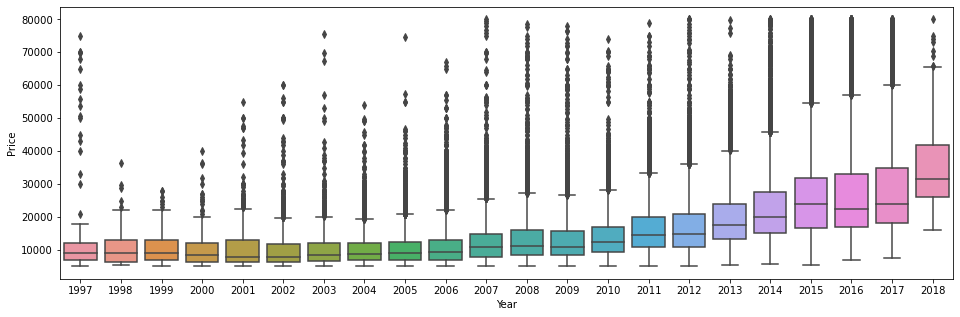

In [113]:

plt.figure(figsize=(16,5))
sn.boxplot(data=data[['Price', 'Year']],  x='Year', y='Price')

<AxesSubplot:xlabel='Price', ylabel='Mileage'>

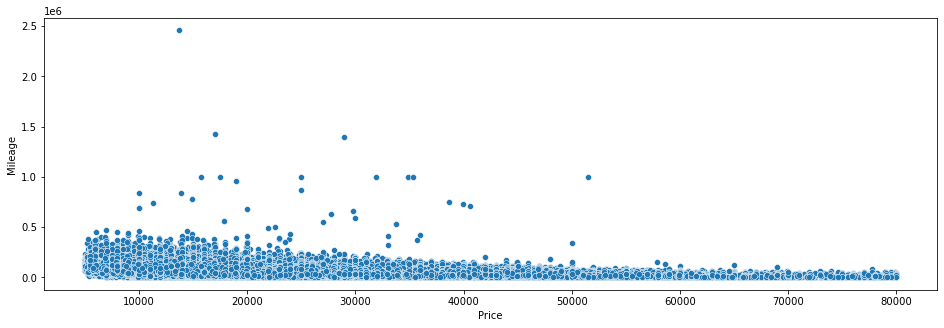

In [117]:
plt.figure(figsize=(16,5))
sn.scatterplot(data=data[['Mileage', 'Price']], y='Mileage', x='Price')

In [111]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

<AxesSubplot:xlabel='State', ylabel='Price'>

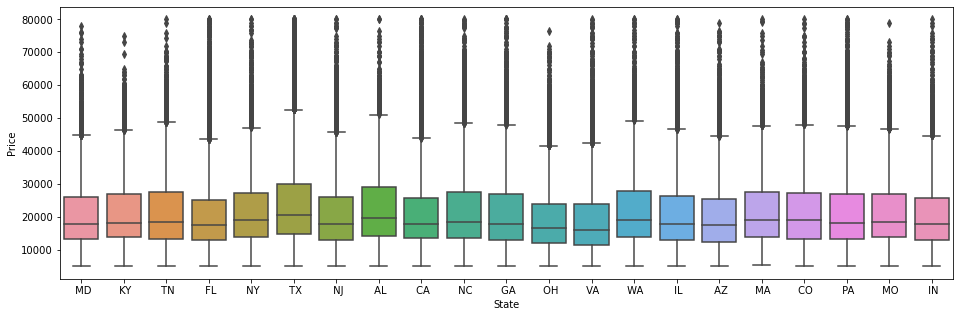

In [110]:
plt.figure(figsize=(16,5))
sn.boxplot(data=data[data['State'].isin(estados.iloc[:21,0])][['Price', 'State']],  x='State', y='Price')

In [118]:
make['Make'].head()

Ford         78627
Chevrolet    72900
Toyota       57485
Honda        41490
Jeep         30413
Name: Make, dtype: int64

In [53]:
modelos['cont_pct'] = modelos['Model'] / 500000

In [57]:
modelos

,Model,cumsum,pct,cont_pct
Silverado,22562,22562,0.045124,0.045124
Grand,15382,37944,0.075888,0.030764
Sierra,10423,48367,0.096734,0.020846
Accord,9145,57512,0.115024,0.018290
F-1504WD,8379,65891,0.131782,0.016758
...,...,...,...,...
Element2WD,69,499735,0.999470,0.000138
MuranoS,68,499803,0.999606,0.000136
PathfinderSE,66,499869,0.999738,0.000132
RX-84dr,66,499935,0.999870,0.000132


In [62]:
import seaborn as sn
import numpy as np

In [121]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import cross_val_score as cvs

In [119]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [120]:
x = data[['Year', 'Mileage']]
y = data['Price']

In [ ]:
modelo_rfr = rfr()

np.mean(cvs(modelo_rfr, x,y, cv=4))

In [90]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [85]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Model', ylabel='Price'>

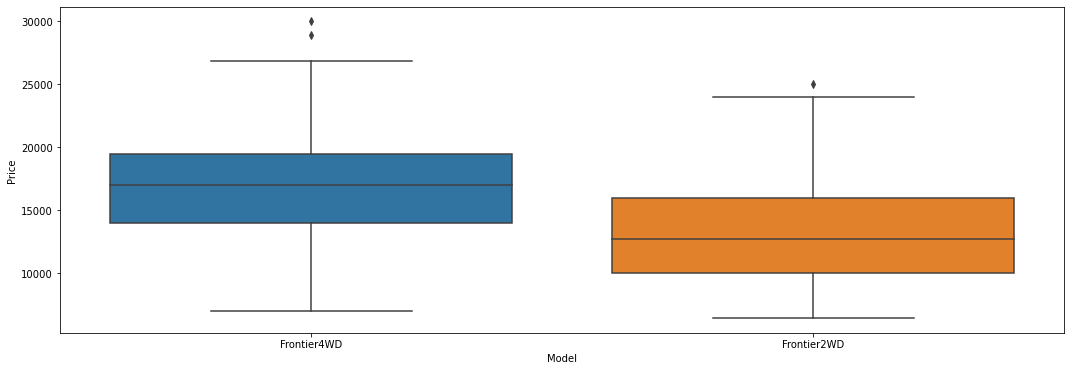

In [89]:
plt.figure(figsize=(18,6))
sn.boxplot(data = data[(data['Make']=='Nissan')&(data['Model'].isin(['Frontier2WD','Frontier4WD']))] , x= 'Model', y='Price')

In [79]:
data[data['Make']=='Nissan']['Model'].value_counts()

MuranoAWD        2088
Altima4dr        1804
Murano2WD         936
Maxima4dr         840
Pathfinder4WD     768
Sentra4dr         694
PathfinderS       587
Armada4WD         540
Titan4WD          451
RogueFWD          429
Armada2WD         419
Pathfinder2WD     408
Versa5dr          369
Frontier2WD       343
Frontier4WD       341
350Z2dr           309
Titan             294
Titan2WD          283
Xterra4WD         243
Versa4dr          240
Quest4dr          216
Frontier          170
Xterra4dr         140
Xterra2WD         122
MuranoS            68
PathfinderSE       66
Name: Model, dtype: int64

In [75]:
tabla_modelos = pd.crosstab(data.Make, data.Model)

tabla_modelos.reset_index(inplace=True)
tabla_modelos.iloc[27].to_frame().reset_index()

,Model,27
0,Make,Nissan
1,1,0
2,15002WD,0
3,15004WD,0
4,1500Laramie,0
...,...,...
521,Yukon4WD,0
522,Yukon4dr,0
523,tC2dr,0
524,xB5dr,0


In [69]:
np.where( pd.crosstab(data.Make, data.Model) > 0, 1,0)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<AxesSubplot:xlabel='Model', ylabel='Price'>

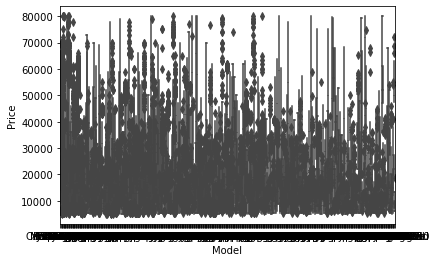

In [63]:
sn.boxplot(data = data[['Price', 'Model']] , x= 'Model', y='Price')

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
